In [17]:
import requests
from PIL import Image
from io import BytesIO
from os import path, makedirs
import codecs

In [30]:
down_rootdir = '/data/kdd/cache/art_gray_256'
failed_file = '{}/failed'.format(down_rootdir)

def append_line_to_file(f_path, line):
    try:
        f_dir = path.dirname(f_path)
        if not path.isdir(f_dir):
            makedirs(f_dir)

        with open(f_path, 'a+', encoding='utf-8') as f:
            f.write('{}\n'.format(line))
            f.close()
    except:
        pass

def down_gray_thumbnail(filename, save_path, size=(256, 256)):
    img_url = 'http://pic.to8to.com/case/{}'.format(filename)
    try:
        res = requests.get(img_url)
    except:
        append_line_to_file(failed_file, path.basename(save_path) + ',' + filename)
        return None
    
    if res.status_code != 200:
        print('{} download failed, with status code {}\n'.format(img_url, res.status_code))
        append_line_to_file(failed_file, path.basename(save_path) + ',' + filename)
        return

    im = Image.open(BytesIO(res.content))
    im.thumbnail(size, Image.ANTIALIAS)

    return im.convert('L' ).save(save_path)

def thread_download(thread_id):
    in_file = 'in/thread-{}-cid_aid_filename.csv'.format(thread_id)
    print('downloading images listed in input file {} ...'.format(in_file))
    with codecs.open(in_file, 'r', encoding='utf-8') as f:
        for line in f:
            cid, aid, filename = line.strip().split(',')
            ext = path.splitext(filename)[1]
            save_path = '{}/{}/{}_{}{}'.format(down_rootdir, cid, cid, aid, ext)
            save_dir = path.dirname(save_path)

            try:
                if not path.isdir(save_dir):
                    makedirs(save_dir)
            except FileExistsError:
                pass

            down_gray_thumbnail(filename, save_path)
            break
        f.close()
    print('{} download completed.'.format(in_file))

thread_download(1)

downloading images listed in input file in/thread-1-cid_aid_filename.csv ...
in/thread-1-cid_aid_filename.csv download completed.


downloading https://pic.to8to.com/case/day_081212/20090218_fa4d6149338441e6efdeSMhd0uZXWzbs.jpg ...


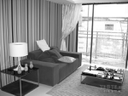

In [7]:
down_gray_thumbnail('day_081212/20090218_fa4d6149338441e6efdeSMhd0uZXWzbs.jpg')

In [25]:
import codecs

downloading https://pic.to8to.com/case/day_081212/20090218_fa4d6149338441e6efdeSMhd0uZXWzbs.jpg ...
saved to download/thumb/gray_256/3/3_15.jpg
downloading https://pic.to8to.com/case/day_081013/20090218_74467e35e9801d4c96deGBzICPWYrvrX.jpg ...
saved to download/thumb/gray_256/3/3_22.jpg
downloading https://pic.to8to.com/case/day_080712/20090218_b1dace65cdfc4b55a95feSqrItvITQuE.jpg ...
saved to download/thumb/gray_256/3/3_17.jpg
downloading https://pic.to8to.com/case/day_080808/20090218_cf8eb1f8bf5ee205e158QtBjP2drpN8H.jpg ...
saved to download/thumb/gray_256/3/3_19.jpg
downloading https://pic.to8to.com/case/day_081230/20090218_6db043a5c24d0fdbedefSvFFIcv5jlaq.jpg ...
saved to download/thumb/gray_256/3/3_18.jpg
downloading https://pic.to8to.com/case/day_080802/20090218_a47c03de4520d1ababd3sSnpidMxkUqy.jpg ...
saved to download/thumb/gray_256/3/3_20.jpg
downloading https://pic.to8to.com/case/day_081115/20090218_b011c8be99044520772cDvDNrxJDhwJi.jpg ...
saved to download/thumb/gray_256/3/3

In [14]:
total = 0

for i in range(1, 9):
    in_file = 'data/art/mul_thread/thread-{}-cid_aid_filename_8354754.csv'.format(i)
    print('infile {}'.format(in_file))
    with codecs.open(in_file, 'r', encoding='utf-8') as f:
        num = len(f.readlines())
        total += num
        print(num)
        f.close()
print('----\n{}'.format(total))

infile data/art/mul_thread/thread-1-cid_aid_filename_8354754.csv
965703
infile data/art/mul_thread/thread-2-cid_aid_filename_8354754.csv
988919
infile data/art/mul_thread/thread-3-cid_aid_filename_8354754.csv
989577
infile data/art/mul_thread/thread-4-cid_aid_filename_8354754.csv
989482
infile data/art/mul_thread/thread-5-cid_aid_filename_8354754.csv
991390
infile data/art/mul_thread/thread-6-cid_aid_filename_8354754.csv
993944
infile data/art/mul_thread/thread-7-cid_aid_filename_8354754.csv
993330
infile data/art/mul_thread/thread-8-cid_aid_filename_8354754.csv
1312516
----
8224861


In [21]:
path.splitext('day_080808/20090218_cf8eb1f8bf5ee205e158QtBjP2drpN8H.jpg')[1]

'.jpg'

In [24]:
total = 0

for i in range(1, 9):
    in_file = 'data/art/mul_thread/thread-{}-ignore_images.csv'.format(i)
    print('infile {}'.format(in_file))
    with codecs.open(in_file, 'r', encoding='utf-8') as f:
        num = len(f.readlines())
        total += num
        print(num)
        f.close()
print('----\n{}'.format(total))

infile data/art/mul_thread/thread-1-ignore_images.csv
34362
infile data/art/mul_thread/thread-2-ignore_images.csv
11085
infile data/art/mul_thread/thread-3-ignore_images.csv
10494
infile data/art/mul_thread/thread-4-ignore_images.csv
10581
infile data/art/mul_thread/thread-5-ignore_images.csv
8622
infile data/art/mul_thread/thread-6-ignore_images.csv
6087
infile data/art/mul_thread/thread-7-ignore_images.csv
6740
infile data/art/mul_thread/thread-8-ignore_images.csv
42244
----
130215


In [26]:
8224861 + 130215

8355076

In [27]:
8355076 * 16 / 1024 / 1024

127.48834228515625

In [28]:
range(1, 9)[:1]

range(1, 2)

In [31]:
for i in range(1, 9):
    print(i)

1
2
3
4
5
6
7
8
